# Introduccion a las redes neuronales profundas
# Proyecto 2 

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
x1 = np.array([[-4,-3],[-4,-1],[-3,-3],[-3,-1],[-3,0],[-2,-2],[0,-1],[1,-1],[1,0],[1,2],
               [2,-1],[2,1],[2,2],[2,3],[2,4],[3,-4],[3,-3],[3,-2],[3,-1],[4,-1]])

x2 = np.array([[-1,-4],[-1,-3],[-1,2],[-1,3],[-1,4],[0,-4],[0,-3],[0,2],[1,-5],[1,-4],
               [1,4],[3,2],[3,3],[4,1],[4,2]])

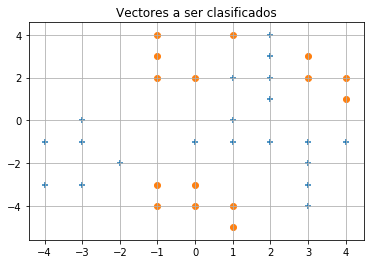

In [25]:
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Vectores a ser clasificados')
plt.grid(True)
plt.show()